In [65]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom 
import matplotlib.pyplot as plt

In [70]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


**To train the Self Organizing Map I will use all the columns but  "CustomerID" and "Class"**

In [72]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
X.shape

(690, 14)

In [87]:
# scale all the data between 0 and 1
sc = MinMaxScaler()
x = sc.fit_transform(X)

In [88]:
# Define the dimension of the grid 
som = MiniSom(x = 10, y = 10, input_len = 14, sigma =1, learning_rate = 0.5, neighborhood_function='gaussian', random_seed=42)
som.random_weights_init(x)

In [89]:
# train the model for 100 epochs
som.train_random(x,100)

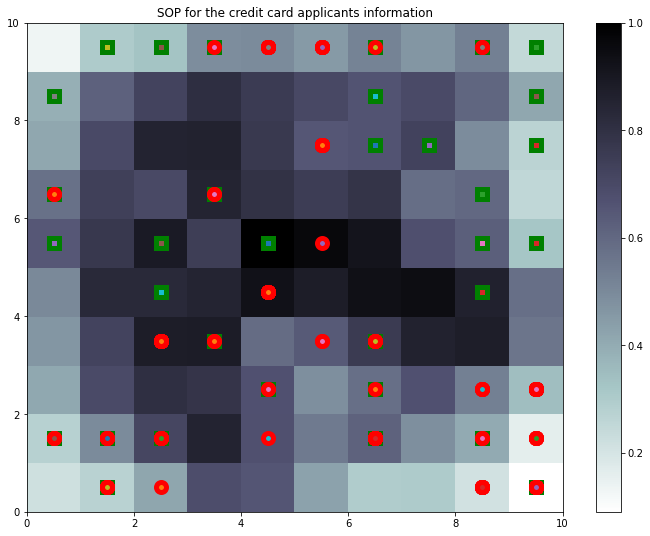

In [93]:
plt.figure(figsize=(12, 9))
plt.title("SOP for the credit card applicants information")

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
# red not approval, green approvved
markers = ["o", 's'] # o is circle, s is square. 
colors = ['r', 'g']
# red circle = was not approved, green square was approved 
for i, xx in enumerate(x):
    w = som.winner(xx)  # give us the winner node for this customer
    plt.plot(w[0]+0.5, w[1]+0.5, markers[y[i]], 
         markeredgecolor = colors[y[i]],
         markerfacecolor = None,
         markersize = 10,
         markeredgewidth = 5)
show()

**100 nodes seems too many, let's try with 81 (9x9)**

In [118]:
# Define the dimension of the grid 
som81 = MiniSom(x = 9, y = 9, input_len = 14, sigma =1, learning_rate = 0.5, neighborhood_function='gaussian')
som81.random_weights_init(x)
# Train the model for 100 epochs
som81.train_random(x,100)

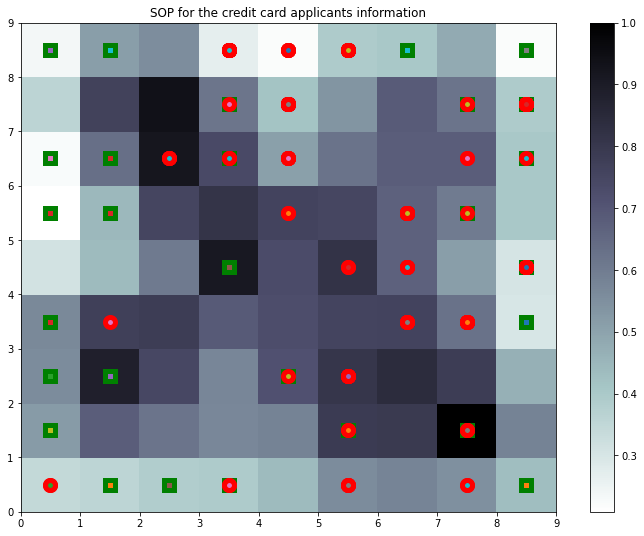

In [119]:
#Plot the SOM
plt.figure(figsize=(12, 9))
plt.title("SOP for the credit card applicants information")

plt.pcolor(som81.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
# red not approval, green approvved
markers = ["o", 's'] # o is circle, s is square. 
colors = ['r', 'g']
# red circle = was not approved, green square was approved 
for i, xx in enumerate(x):
    w = som81.winner(xx)  # give us the winner node for this customer
    plt.plot(w[0]+0.5, w[1]+0.5, markers[y[i]], 
         markeredgecolor = colors[y[i]],
         markerfacecolor = None,
         markersize = 10,
         markeredgewidth = 5)
show()

**With 81 neurons there are less empty nodes. However it is not easy to see how many samples
are present in each node since squares and circles overlap**

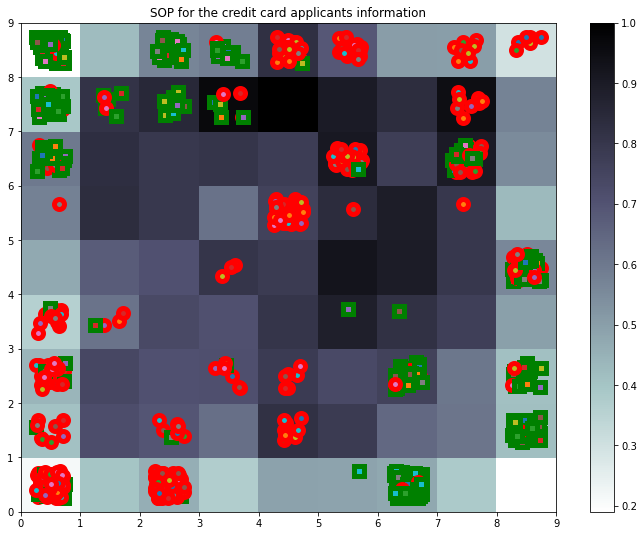

In [113]:
plt.figure(figsize=(12, 9))
plt.title("SOP for the credit card applicants information")

plt.pcolor(som81.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
# red not approval, green approvved
markers = ["o", 's'] # o is circle, s is square. 
colors = ['r', 'g']
# red circle = was not approved, green square was approved 
for i, xx in enumerate(x):
    w = som81.winner(xx)  # give us the winner node for this customer
    plt.plot(w[0]+0.25+np.random.random()/2, w[1]+0.25+np.random.random()/2, markers[y[i]], 
         markeredgecolor = colors[y[i]],
         markerfacecolor = None,
         markersize = 10,
         markeredgewidth = 5)
show()

**The addition of some jittering to the value of the x,y coordinates allows a better understanding of how the samples are distributed.**
There are three clear clusters of data:
 - Top left cluster: mostly green squares
 - The cluster localized on the diagonal: mostly red cyrcles
 - Bottom right cluster:  mostly green squares
 
There two nodes whose mean interneuron distance (MID) is almost one (4,8 and 7,7): these contain several outliers. 